In [1]:
# How to handle outliers

In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv("C:\\Users\\User\\Desktop\\ML\\newplacementdata.csv")

In [6]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0


In [7]:
#even = ((n/2)*(n/2)+1))/2
#odd = ((n/2)+1)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\User\AppData\Local\Temp\ipykernel_12836\48147761.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\User\AppData\Local\Temp\ipykernel_12836\48147761.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


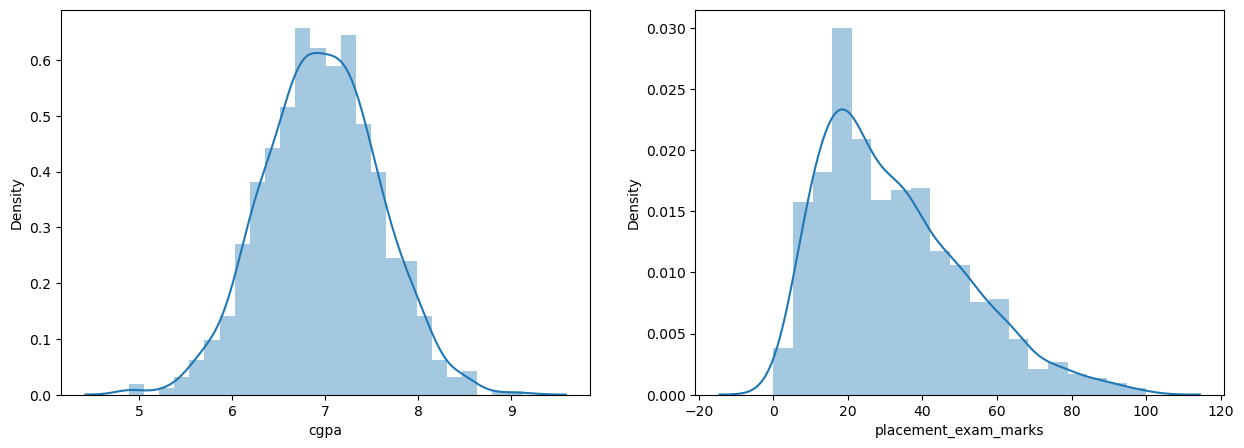

In [9]:
plt.figure(figsize = (15,5))
plt.subplot(121)
sns.distplot(df['cgpa'])
plt.subplot(122)
sns.distplot(df['placement_exam_marks'])
plt.show()

In [19]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: >

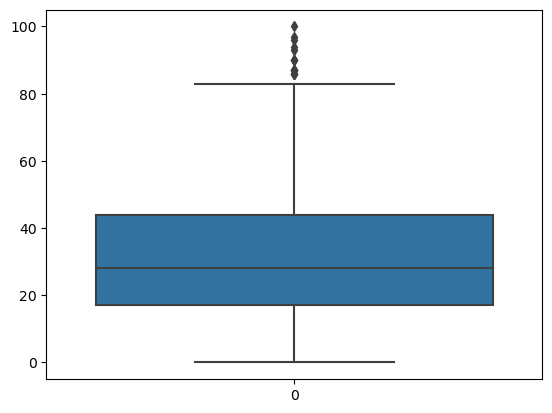

In [10]:
sns.boxplot(df['placement_exam_marks'])

In [13]:
#finding the IRQ

percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [14]:
percentile25

17.0

In [15]:
percentile75

44.0

In [16]:
IQR = percentile75 - percentile25

In [17]:
IQR

27.0

In [18]:
upper_limit = percentile75 + 1.5*IQR

In [16]:
upper_limit

84.5

In [17]:
lower_limit = percentile25 - 1.5*IQR
lower_limit

-23.5

In [18]:
#Finding Our Outliers
df[df['placement_exam_marks'] > upper_limit]


,cgpa,placement_exam_marks,placed
9,7.75,94,1
40,6.60,86,1
61,7.51,86,0
134,6.33,93,0
162,7.80,90,0
283,7.09,87,0
290,8.38,87,0
311,6.97,87,1
324,6.64,90,0
630,6.56,96,1


In [19]:
newdf = df[df['placement_exam_marks'] < lower_limit]
newdf

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


In [19]:
#Comparision

C:\Users\User\AppData\Local\Temp\ipykernel_12836\3166905444.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


NameError: name 'newdf' is not defined

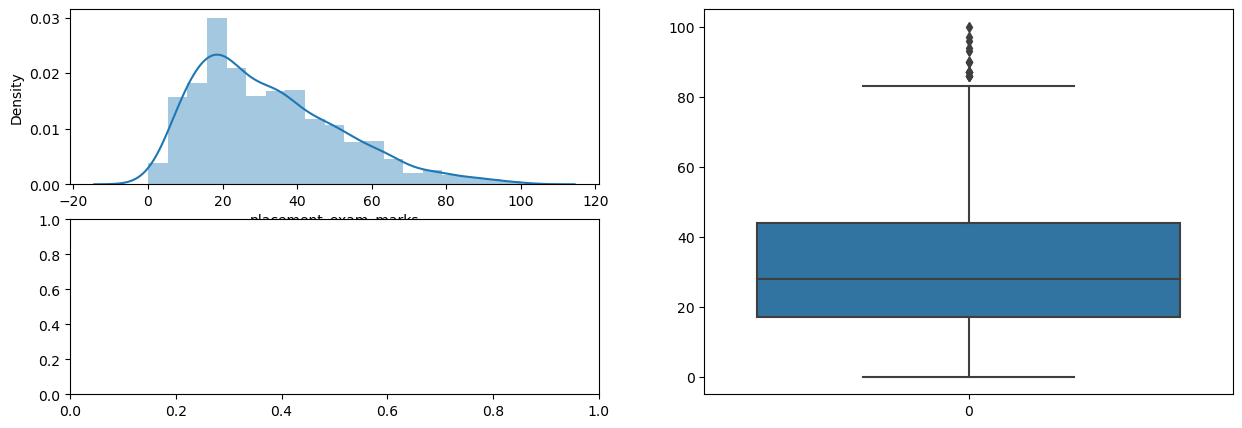

In [20]:
plt.figure(figsize = (15,5))
plt.subplot(221)
sns.distplot(df['placement_exam_marks'])

plt.subplot(122)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(223)
sns.distplot(newdf['placement_exam_marks'])

plt.subplot(224)
sns.boxplot(newdf['placement_exam_marks'])
plt.show()

In [22]:
#capping (outlier removing technique)

In [23]:
new_df_cap = df.copy()

In [25]:
# min = 5 , max 15

# min 4 ,3, 1


In [26]:
new_df_cap['placement_exam_marks'] = np.where(
    
    new_df_cap['placement_exam_marks'] > upper_limit ,
    upper_limit,
    
    np.where(
    new_df_cap['placement_exam_marks'] < lower_limit , 
    lower_limit ,
    new_df_cap['placement_exam_marks']
        
    )
    
)

In [27]:
new_df_cap

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [28]:
# Homework 
# Q.1> how u can get second highest salary from an employee table
# Q.2> find the name of employees who have joined in last 30 days
# Q.3> count the number of employees in each department
# Q.4> find the nth highest salary from an employee table
# Q.5> find the nth lowest salary from an employee table
# Q.6> find the employees whose name start with 'a' and ends with 'a'.
# Q.7> find the employees who have not been assigned any project.
# Q.8> find the employees who are highest paid.
# Q.9> find the employees with first name same but last name different.
# Q.10> find the employees who have salaries above the average salary of the dept.
# Q.11> find the employees who are managers themselves.

In [21]:
dff = pd.read_csv("C:\\Users\\User\\Desktop\\ML\\tips.csv")

In [22]:
dff.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\User\AppData\Local\Temp\ipykernel_12836\1546705433.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dff['size'])
C:\Users\User\AppData\Local\Temp\ipykernel_12836\1546705433.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dff['tip'])


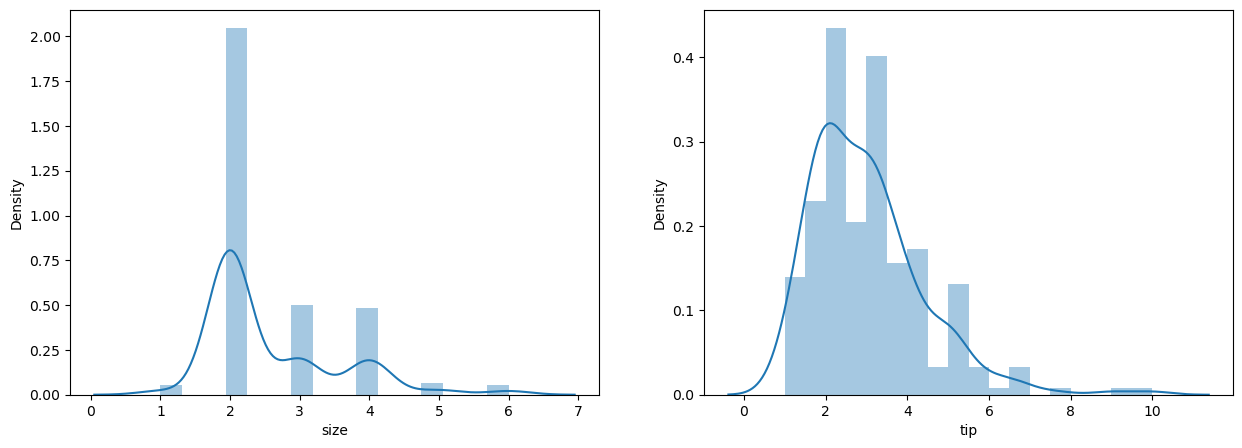

In [24]:
plt.figure(figsize = (15,5))
plt.subplot(121)
sns.distplot(dff['size'])
plt.subplot(122)
sns.distplot(dff['tip'])
plt.show()

In [25]:
dff['size'].describe()

count    244.000000
mean       2.569672
std        0.951100
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: size, dtype: float64

<Axes: >

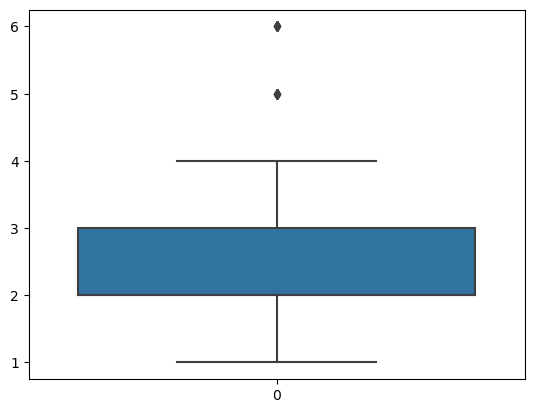

In [26]:
sns.boxplot(dff['size'])

In [27]:
#finding the IRQ

percentile25 = dff['size'].quantile(0.25)
percentile75 = dff['size'].quantile(0.75)

In [28]:
percentile25

2.0

In [29]:
percentile75

3.0

In [30]:
IQR = percentile75 - percentile25

In [31]:
IQR

1.0

In [32]:
upper_limit = percentile75 + 1.5*IQR

In [33]:
upper_limit

4.5

In [34]:
lower_limit = percentile25 - 1.5*IQR
lower_limit

0.5

In [35]:
#Finding Our Outliers
dff[dff['size'] > upper_limit]


,total_bill,tip,sex,smoker,day,time,size
125,29.80,4.20,Female,No,Thur,Lunch,6
141,34.30,6.70,Male,No,Thur,Lunch,6
142,41.19,5.00,Male,No,Thur,Lunch,5
143,27.05,5.00,Female,No,Thur,Lunch,6
155,29.85,5.14,Female,No,Sun,Dinner,5
156,48.17,5.00,Male,No,Sun,Dinner,6
185,20.69,5.00,Male,No,Sun,Dinner,5
187,30.46,2.00,Male,Yes,Sun,Dinner,5
216,28.15,3.00,Male,Yes,Sat,Dinner,5


In [36]:
newdf = dff[dff['size'] < lower_limit]
newdf

,total_bill,tip,sex,smoker,day,time,size


C:\Users\User\AppData\Local\Temp\ipykernel_12836\3834142217.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dff['size'])
C:\Users\User\AppData\Local\Temp\ipykernel_12836\3834142217.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(newdf['size'])
C:\Users\User\anaconda3\Lib\site-packages\se

KeyError: 0

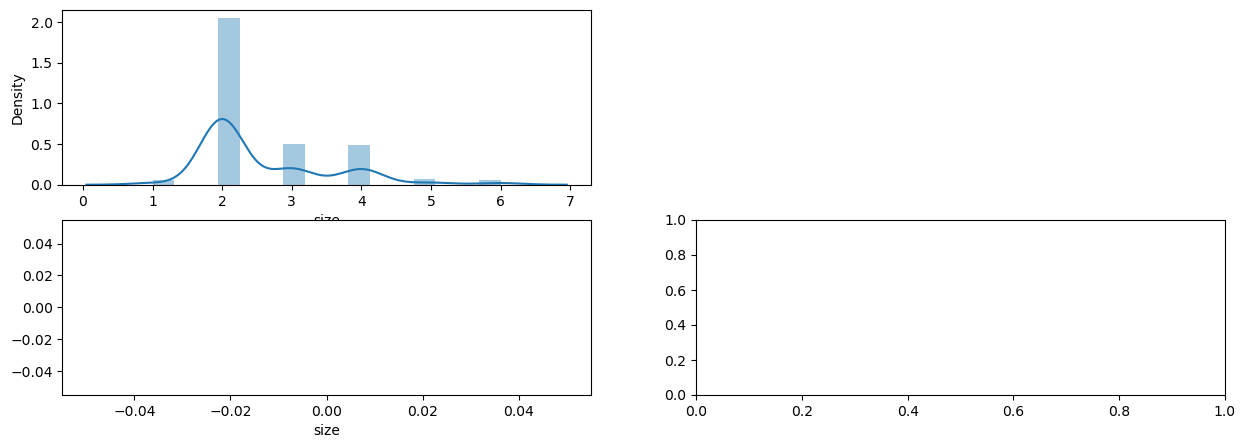

In [37]:
plt.figure(figsize = (15,5))
plt.subplot(221)
sns.distplot(dff['size'])

plt.subplot(122)
sns.boxplot(dff['size'])

plt.subplot(223)
sns.distplot(newdf['size'])

plt.subplot(224)
sns.boxplot(newdf['size'])
plt.show()

In [38]:
new_dff_cap = dff.copy()

In [39]:
new_dff_cap['size'] = np.where(
    
    new_dff_cap['size'] > upper_limit ,
    upper_limit,
    
    np.where(
    new_dff_cap['size'] < lower_limit , 
    lower_limit ,
    new_dff_cap['size']
        
    )
    
)

In [40]:
new_dff_cap

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3.0
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0
242,17.82,1.75,Male,No,Sat,Dinner,2.0


In [43]:
df1 = pd.read_csv("C://Users//User//Desktop//ML//covid_toy.csv")

In [44]:
df1.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [45]:
df1 = df1.dropna()

In [46]:
df1 = df1.drop(columns = ['age' , 'fever'])

In [47]:
df1

,gender,cough,city,has_covid
0,Male,Mild,Kolkata,No
1,Male,Mild,Delhi,Yes
2,Male,Mild,Delhi,No
3,Female,Mild,Kolkata,No
4,Female,Mild,Mumbai,No
...,...,...,...,...
95,Female,Mild,Bangalore,No
96,Female,Strong,Kolkata,Yes
97,Female,Mild,Bangalore,No
98,Female,Strong,Mumbai,No


In [48]:
x = df1.drop('has_covid' , axis = 1)
y = df1['has_covid']

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2)

In [51]:
from sklearn.preprocessing import OrdinalEncoder

In [56]:
oe = OrdinalEncoder(categories = [['Male','Female'],['Mild','Strong'],['Kolkata','Delhi','Mumbai','Bangalore']])

In [57]:
oe

OrdinalEncoder(categories=[['Male', 'Female'], ['Mild', 'Strong'],
                           ['Kolkata', 'Delhi', 'Mumbai', 'Bangalore']])

In [58]:
oe.fit(x_train)

OrdinalEncoder(categories=[['Male', 'Female'], ['Mild', 'Strong'],
                           ['Kolkata', 'Delhi', 'Mumbai', 'Bangalore']])

In [59]:
x_train

,gender,cough,city
47,Female,Mild,Bangalore
24,Female,Strong,Kolkata
78,Male,Mild,Bangalore
93,Male,Mild,Kolkata
69,Female,Mild,Delhi
...,...,...,...
59,Female,Mild,Kolkata
2,Male,Mild,Delhi
36,Female,Mild,Bangalore
55,Female,Mild,Mumbai


In [60]:
x_train = oe.transform(x_train)

In [61]:
oe.categories_

[array(['Male', 'Female'], dtype=object),
 array(['Mild', 'Strong'], dtype=object),
 array(['Kolkata', 'Delhi', 'Mumbai', 'Bangalore'], dtype=object)]

In [62]:
x_train

array([[1., 0., 3.],
       [1., 1., 0.],
       [0., 0., 3.],
       [0., 0., 0.],
       [1., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 1., 3.],
       [1., 1., 1.],
       [0., 0., 3.],
       [0., 0., 3.],
       [0., 0., 0.],
       [0., 1., 0.],
       [1., 0., 2.],
       [1., 1., 0.],
       [1., 0., 3.],
       [1., 0., 0.],
       [1., 1., 0.],
       [1., 1., 1.],
       [0., 1., 1.],
       [1., 0., 3.],
       [0., 0., 3.],
       [0., 0., 1.],
       [1., 1., 3.],
       [1., 0., 2.],
       [0., 0., 0.],
       [0., 1., 3.],
       [1., 0., 0.],
       [0., 0., 0.],
       [1., 1., 1.],
       [0., 1., 3.],
       [0., 0., 3.],
       [1., 0., 3.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 1., 0.],
       [0., 1., 3.],
       [1., 1., 3.],
       [1., 1., 0.],
       [0., 0., 2.],
       [1., 1., 3.],
       [0., 1., 3.],
       [1., 1., 3.],
       [1., 1., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0